In [1]:
import pandas as pd
import numpy as np

In [2]:
file='C:/Users/patel/Downloads/weather.csv'

In [3]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [4]:
df=pd.read_csv(file, encoding ='ascii')

In [5]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [6]:
#checking for null values
df.isnull().values.any()

False

In [7]:
#NO NaN values in the dataframe

In [8]:
#Converting the string values of weather into binary values
pd.get_dummies(df['weather'])

,drizzle,fog,rain,snow,sun
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1456,0,0,1,0,0
1457,0,0,1,0,0
1458,0,1,0,0,0
1459,0,0,0,0,1


In [9]:
#concatanating binary weather columns into the dataframe
df = pd.concat([df, pd.get_dummies(df['weather'])], axis=1)

In [10]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun
0,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0
1,10.9,10.6,2.8,4.5,rain,0,0,1,0,0
2,0.8,11.7,7.2,2.3,rain,0,0,1,0,0
3,20.3,12.2,5.6,4.7,rain,0,0,1,0,0
4,1.3,8.9,2.8,6.1,rain,0,0,1,0,0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

<AxesSubplot:xlabel='weather', ylabel='precipitation'>

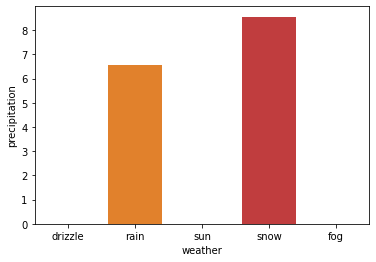

In [23]:
sb.barplot(x=df.weather,y=df.precipitation,ci=None)

<AxesSubplot:xlabel='weather', ylabel='wind'>

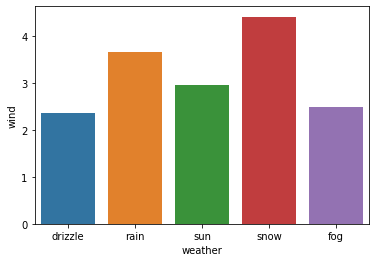

In [24]:
sb.barplot(x=df.weather,y=df.wind,ci=None)

<AxesSubplot:xlabel='weather', ylabel='temp_max'>

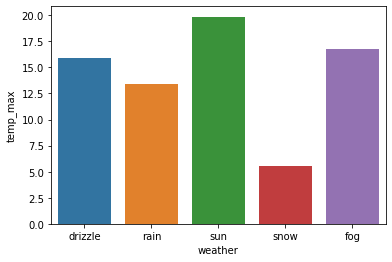

In [25]:
sb.barplot(x=df.weather,y=df.temp_max,ci=None)

<AxesSubplot:xlabel='weather', ylabel='temp_min'>

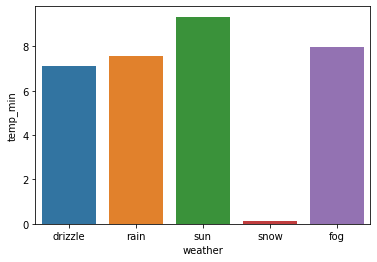

In [26]:
sb.barplot(x=df.weather,y=df.temp_min,ci=None)

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X=df[['precipitation','wind','temp_max','temp_min']]
y=df['weather']

In [147]:
#performing test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [148]:
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (949, 4)
X_test dimension=  (512, 4)
y_train dimension=  (949,)
y_train dimension=  (512,)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [150]:
#initializing the model-using One vs. Rest Algorithm
model=LogisticRegression(multi_class='multinomial')


In [151]:
#fitting the data in model
model.fit(X_train, y_train)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [152]:
#predicting on test data
y_pred = model.predict(X_test)

In [153]:
print(y_pred)

['sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun'
 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun'
 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun'
 'rain' 'sun' 'rain' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun'
 'sun' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun'
 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun'
 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'rain'
 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain'
 'sun' 'rain' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain' 'sun'
 'rain' 'sun' 'sun' 'rain' 'snow' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain'
 'rain' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'rain'
 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun'
 'sun' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain'
 'rain' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'su

In [154]:
np.unique(y_pred, return_counts=True)


(array(['rain', 'snow', 'sun'], dtype=object),
 array([217,   1, 294], dtype=int64))

In [155]:
#Checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:}')


Accuracy: 0.8515625


In [160]:
#plotting the confusion matrix using seaborn and sklearn 
from sklearn.metrics import confusion_matrix

In [167]:
cm=confusion_matrix(y_test, y_pred)

In [168]:
cm

array([[  0,   0,   0,   0,  15],
       [  0,   0,   0,   0,  37],
       [  0,   0, 209,   0,  16],
       [  0,   0,   8,   1,   0],
       [  0,   0,   0,   0, 226]], dtype=int64)

In [176]:
labels=['drizzle','fog','rain','snow','sun']

<AxesSubplot:>

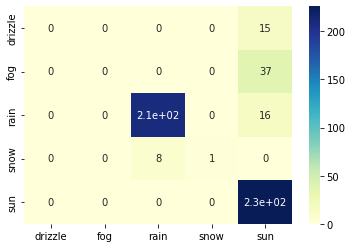

In [179]:
sb.heatmap(cm,annot=True,xticklabels=labels,yticklabels=labels,cmap='YlGnBu')